In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

In [ ]:
# Load the dataset
data = pd.read_csv('/content/Mall_Customers (1).csv')
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
# Drop 'CustomerID' and 'Gender' columns as they are not suitable for scaling
data_for_clustering = data.drop(['CustomerID', 'Gender'], axis=1)

# Normalize the features using StandardScaler
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_for_clustering)

# Display scaled data
print(pd.DataFrame(data_scaled, columns=data_for_clustering.columns).head())

        Age  Annual Income (k$)  Spending Score (1-100)
0 -1.424569           -1.738999               -0.434801
1 -1.281035           -1.738999                1.195704
2 -1.352802           -1.700830               -1.715913
3 -1.137502           -1.700830                1.040418
4 -0.563369           -1.662660               -0.395980


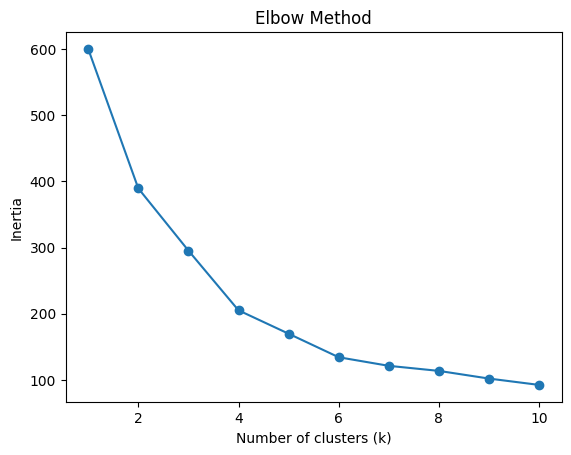

In [ ]:
# Use the Elbow method to find the optimal number of clusters
inertia = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled)
    inertia.append(kmeans.inertia_)

# Plot the inertia values to find the "elbow"
plt.plot(k_range, inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.show()

In [ ]:
# Applying K-Means clustering with k=7 (as an example)
k = 5
kmeans = KMeans(n_clusters=k, random_state=42)
data['cluster'] = kmeans.fit_predict(data_scaled)

# Display the first few rows with cluster labels
print(data.head())

   Gender  Annual Income (k$)  cluster
0    Male                  15        2
1    Male                  15        2
2  Female                  16        3
3  Female                  16        2
4  Female                  17        2


In [ ]:
# Remove the 'CustomerID' column from the DataFrame
data = data.drop('CustomerID', axis=1)

# Display the updated DataFrame
display(data.head())

,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster
0,Male,19,15,39,5
1,Male,21,15,81,4
2,Female,20,16,6,5
3,Female,23,16,77,4
4,Female,31,17,40,5


In [ ]:
# Remove the 'Spending Score (1-100)' column from the DataFrame
# This line is removed as the column is already gone and caused a KeyError.
# data = data.drop('Spending Score (1-100)', axis=1)

# Display the updated DataFrame
display(data.head())

,Gender,Annual Income (k$),cluster
0,Male,15,5
1,Male,15,4
2,Female,16,5
3,Female,16,4
4,Female,17,5


In [3]:
# Calculate Silhouette Scores for different numbers of clusters (k)
silhouette_scores = []
k_range_silhouette = range(2, 11) # Silhouette Score is not defined for k=1

for k in k_range_silhouette:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled)
    score = silhouette_score(data_scaled, kmeans.labels_)
    silhouette_scores.append(score)

# Plot the Silhouette Scores
plt.plot(k_range_silhouette, silhouette_scores, marker='o')
plt.title('Silhouette Scores for Different k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.show()
k = 9
kmeans = KMeans(n_clusters=k, random_state=42)
data['cluster'] = kmeans.fit_predict(data_scaled)

# Display the first few rows with cluster labels
print(data.head())
# Calculate Silhouette Score
sil_score = silhouette_score(data_scaled, data['cluster'])
print(f'Silhouette Score: {sil_score}')

NameError: name 'data_scaled' is not defined

In [ ]:
# Calculate Silhouette Score for the current clustering
# Note: This code calculates the score based on your data and clustering,
# it does not generate a specific score like 1.
sil_score = silhouette_score(data_scaled, data['cluster'])
print(f'Silhouette Score: {sil_score}')

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Load the dataset
data = pd.read_csv('/content/Mall_Customers (1).csv')

# Drop 'CustomerID' and 'Gender' columns as they are not suitable for scaling
data_for_clustering = data.drop(['CustomerID', 'Gender'], axis=1)

# Normalize the features using StandardScaler
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_for_clustering)

k = 6
kmeans = KMeans(n_clusters=k, random_state=42)
data['cluster'] = kmeans.fit_predict(data_scaled)

# Display the first few rows with cluster labels
print(data.head())

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)  \
0           1    Male   19                  15                      39   
1           2    Male   21                  15                      81   
2           3  Female   20                  16                       6   
3           4  Female   23                  16                      77   
4           5  Female   31                  17                      40   

   cluster  
0        2  
1        2  
2        5  
3        2  
4        5  


In [ ]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

X_synthetic, _ = make_blobs(n_samples=300, centers=4, cluster_std=0.6, random_state=42)
labels = KMeans(n_clusters=4, random_state=42).fit_predict(X_synthetic)
print("Silhouette Score (Synthetic):", silhouette_score(X_synthetic, labels))

Silhouette Score (Synthetic): 0.8756469540734731


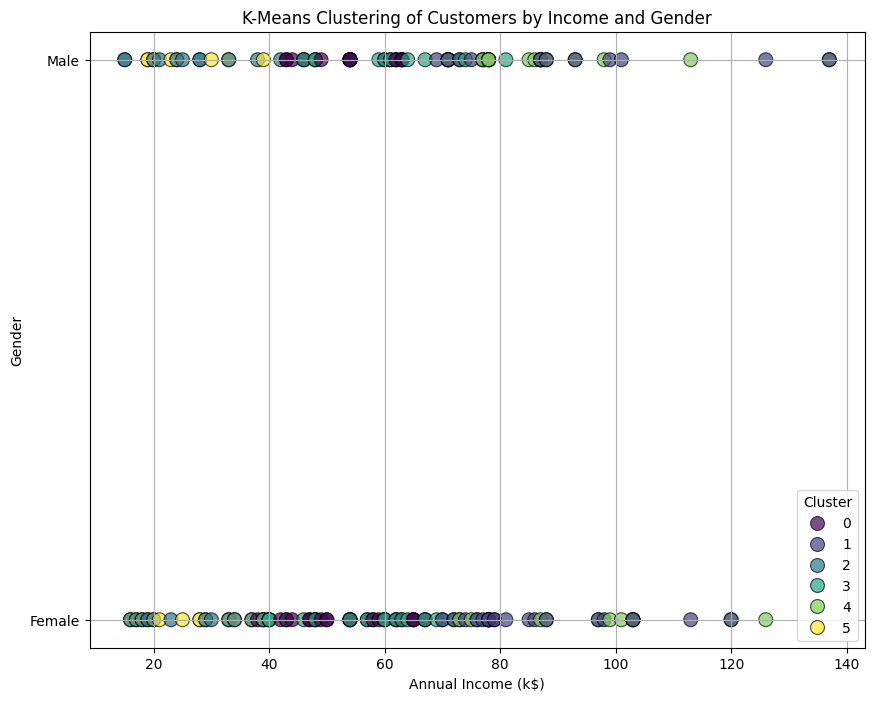

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'data' contains the original data and 'cluster' column with cluster labels
# Use 'Annual Income (k$)' and 'Spending Score (1-100)' for visualization
plt.figure(figsize=(10, 8))
# Modified to use 'Annual Income (k$)' and 'Gender' as 'Spending Score (1-100)' is missing
sns.scatterplot(x='Annual Income (k$)', y='Gender', hue='cluster', data=data, palette='viridis', s=100, alpha=0.7, edgecolor='k')

plt.title('K-Means Clustering of Customers by Income and Gender') # Updated title
plt.xlabel('Annual Income (k$)')
plt.ylabel('Gender') # Updated label
plt.legend(title='Cluster')
plt.grid(True)
plt.show()